In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [ ]:
pip install scikit-learn==1.4.2 imbalanced-learn==0.12.2 xgboost==2.0.3 lightgbm==4.3.0

In [2]:
import sklearn
import imblearn
import xgboost
import lightgbm
import sys

print("Python Version:", sys.version)
print("--------------------")
print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)
print("xgboost version:", xgboost.__version__)
print("lightgbm version:", lightgbm.__version__)

Python Version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
--------------------
scikit-learn version: 1.4.2
imbalanced-learn version: 0.12.2
xgboost version: 2.0.3
lightgbm version: 4.3.0


In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import pyplot
from numpy import where
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [5]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: title={'center': 'Time Distribution'}, xlabel='Time', ylabel='Density'>

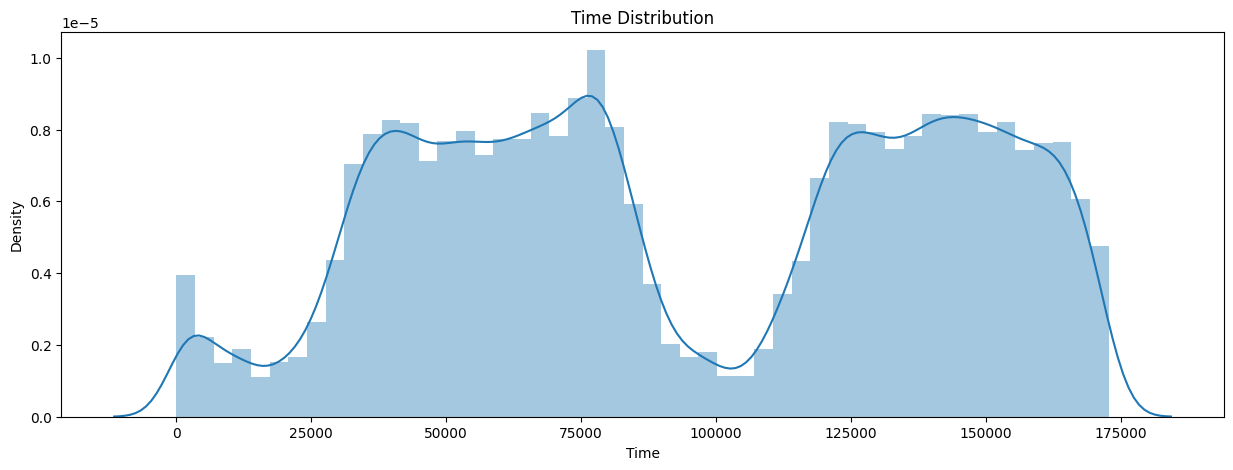

In [9]:
plt.figure(figsize=(15,5))
plt.title('Time Distribution')
sns.distplot(data.Time)

<Axes: title={'center': 'Distribution of transaction value'}, xlabel='Amount', ylabel='Density'>

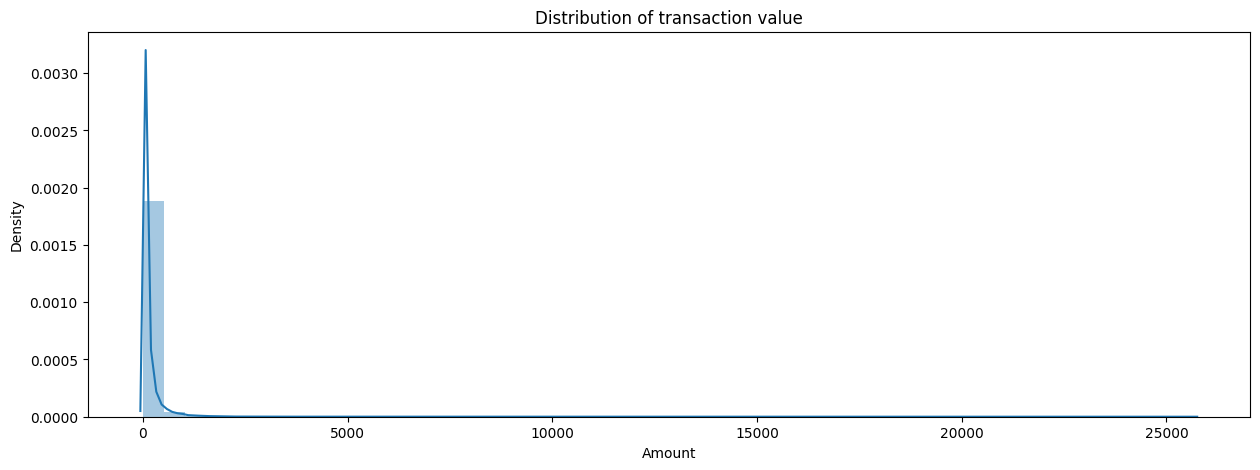

In [10]:
plt.figure(figsize=(15,5))
plt.title('Distribution of transaction value')
sns.distplot(data.Amount)

In [11]:
#fraud vs. normal transactions 
counts = data.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

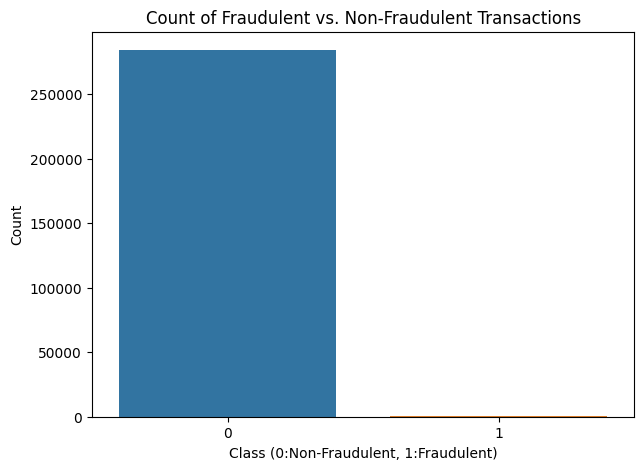

In [12]:
plt.figure(figsize=(7,5))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

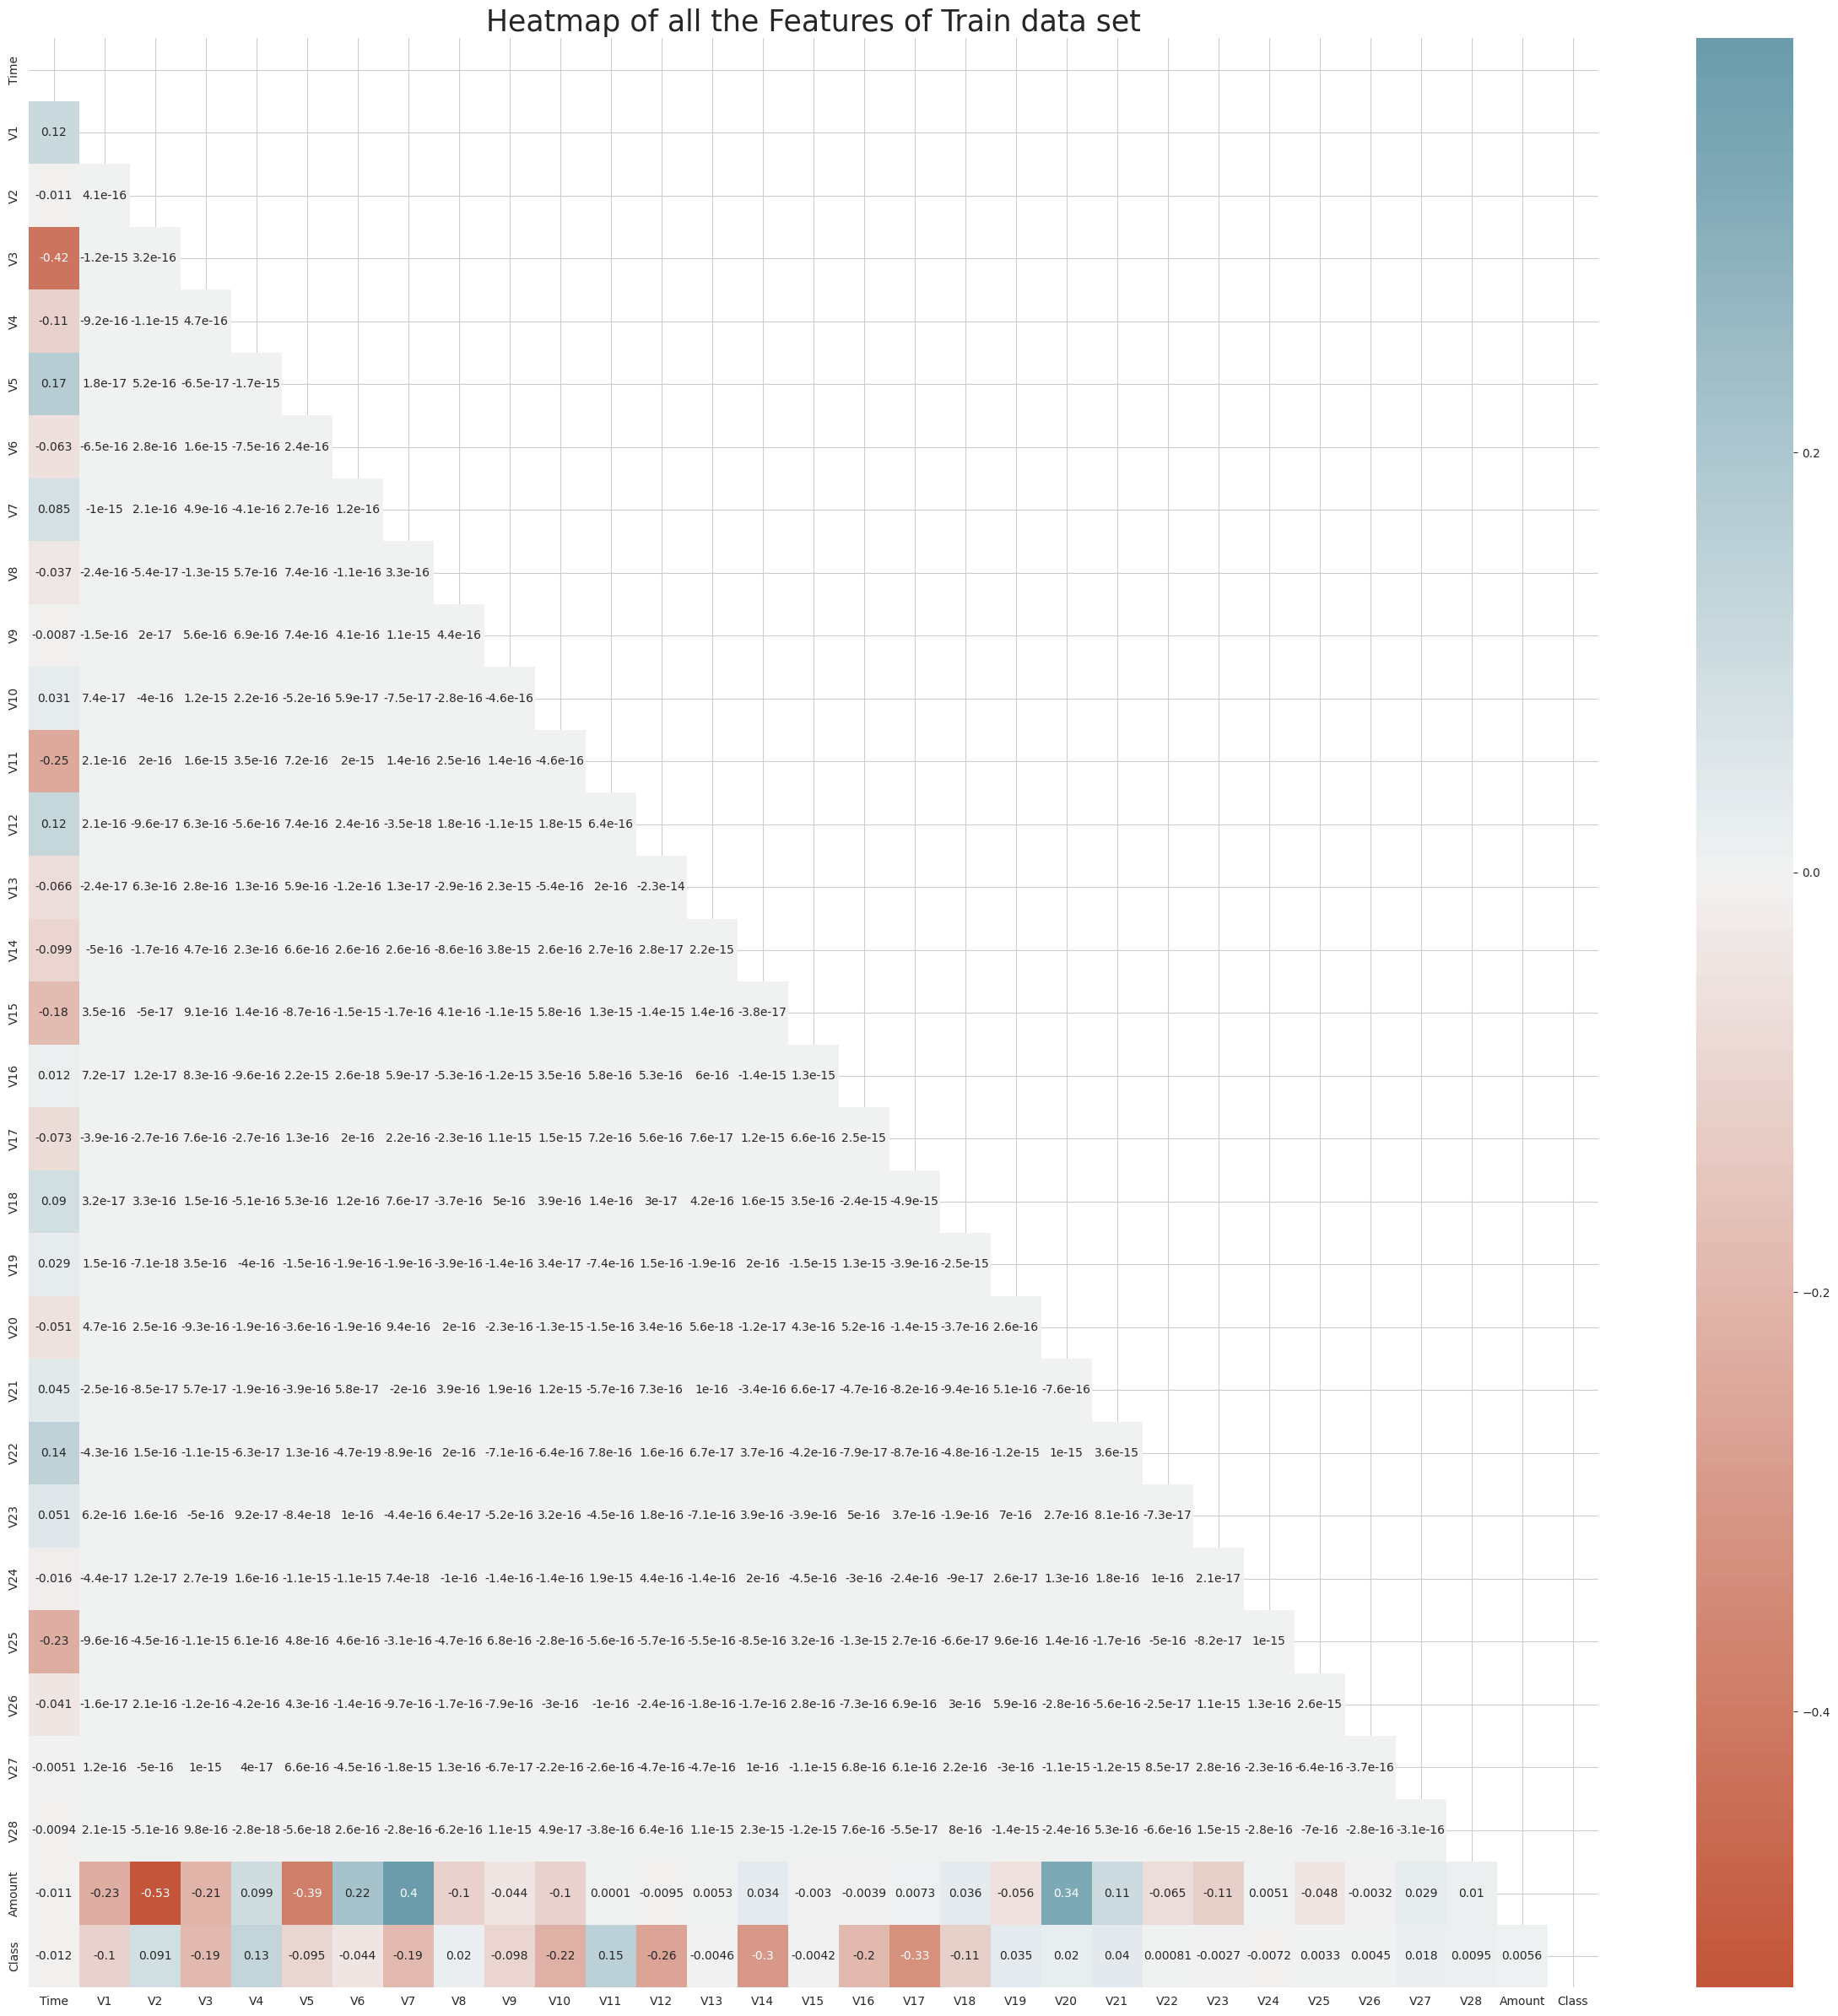

In [13]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

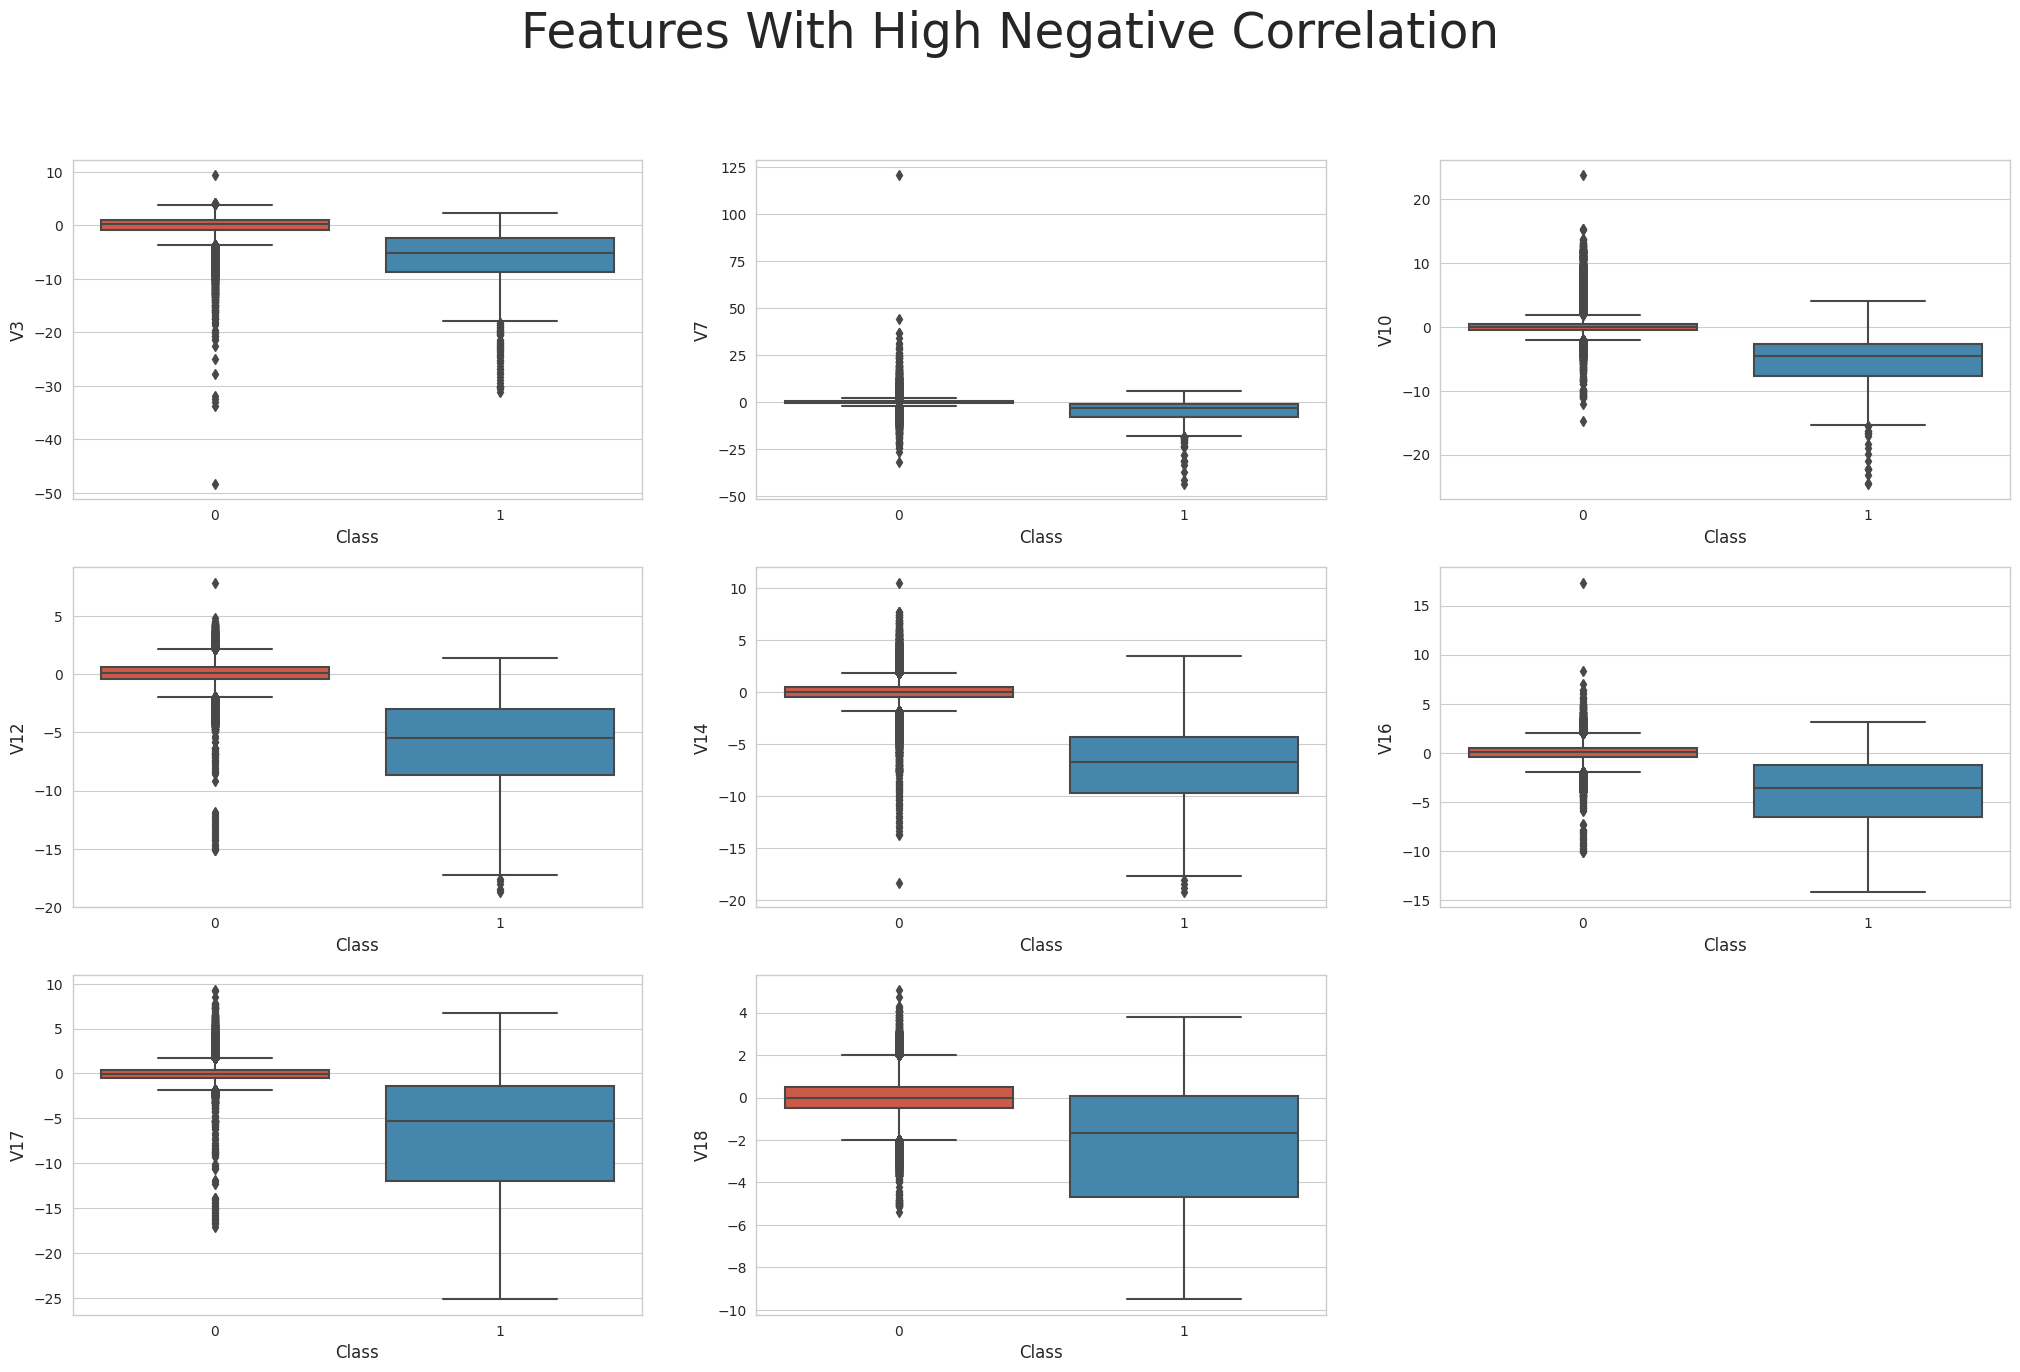

In [14]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,15))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=data, ax=axes[0,0])
sns.boxplot(x="Class", y="V7", data=data, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=data, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=data, ax=axes[1,0])
sns.boxplot(x="Class", y="V14", data=data, ax=axes[1,1])
sns.boxplot(x="Class", y="V16", data=data, ax=axes[1,2])
sns.boxplot(x="Class", y="V17", data=data, ax=axes[2,0])
sns.boxplot(x="Class", y="V18", data=data, ax=axes[2,1])
f.delaxes(axes[2,2])

<Axes: xlabel='Class', ylabel='V11'>

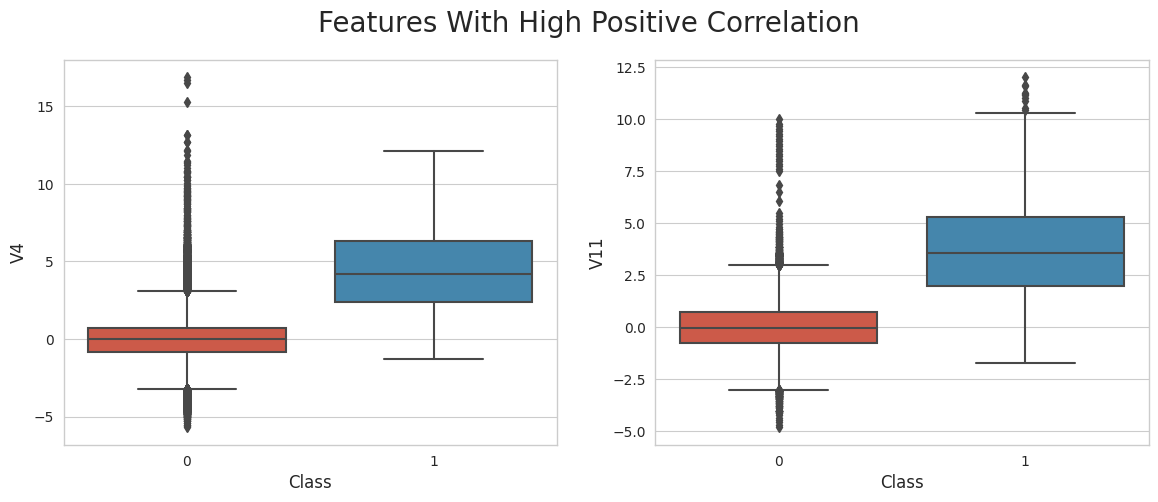

In [15]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=data, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=data, ax=axes[1])

In [16]:
def Definedata():
    # define dataset
    X=data.drop(columns=['Class']).values
    y=data['Class'].values
    return X, y

In [17]:
def SMOTE():
    # borderline-SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_resample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [18]:
def BSMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import BorderlineSMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()
    
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [19]:
def SMOTESVM():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = SVMSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [20]:
def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


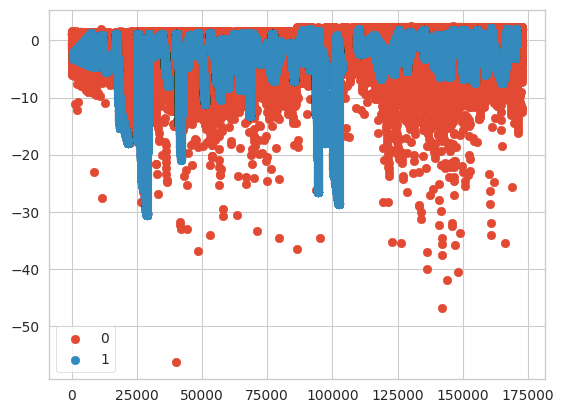

CPU times: user 6.39 s, sys: 751 ms, total: 7.14 s
Wall time: 7.12 s
Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


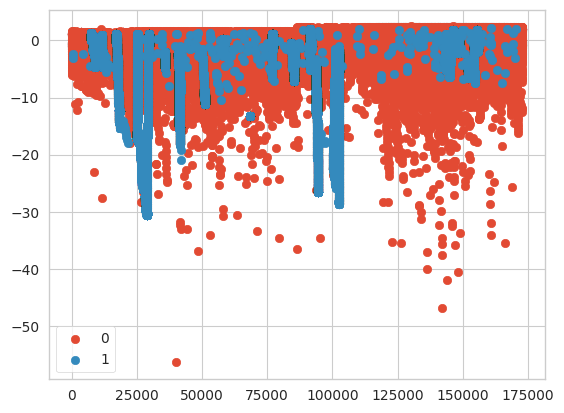

CPU times: user 8.36 s, sys: 797 ms, total: 9.15 s
Wall time: 8.37 s
Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


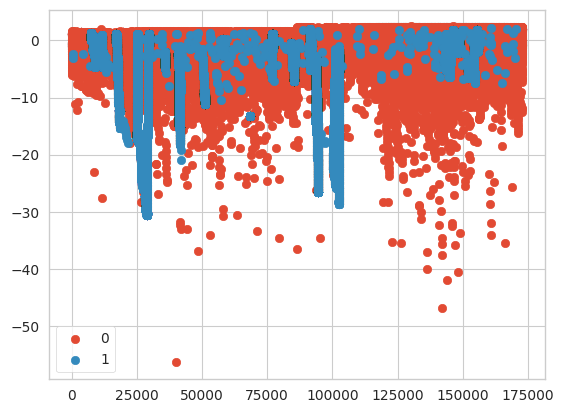

CPU times: user 23.5 s, sys: 815 ms, total: 24.3 s
Wall time: 23.3 s
Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284298})


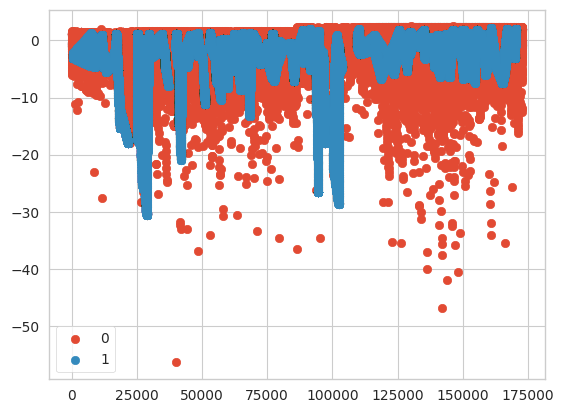

CPU times: user 8.01 s, sys: 587 ms, total: 8.6 s
Wall time: 7.89 s


In [21]:
%time X_train1, X_test1, y_train1, y_test1 = SMOTE()
%time X_train2, X_test2, y_train2, y_test2 = BSMOTE()
%time X_train3, X_test3, y_train3, y_test3 = SMOTESVM()
%time X_train4, X_test4, y_train4, y_test4 = ADASYN()

In [22]:
def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    #f = plt.figure(figsize=(20, 3))
    
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 16},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total Fraud = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score for Trainingset: {}'.format(accuracy_score(model.predict(X_train), y_train)))
    
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax2)
    g2.set_ylabel('Total Fraud = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score for Testingset: {}'.format(accuracy_score(model.predict(X_test), y_test)))
    
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax3)
    g3.set_ylabel('Total Fraud = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score for Totalset: {}'.format(accuracy_score(model.predict(X), y)))
    
    plt.show()
    return y, model.predict(X)
    
def Featureimportances(models, X_train, y_train):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp



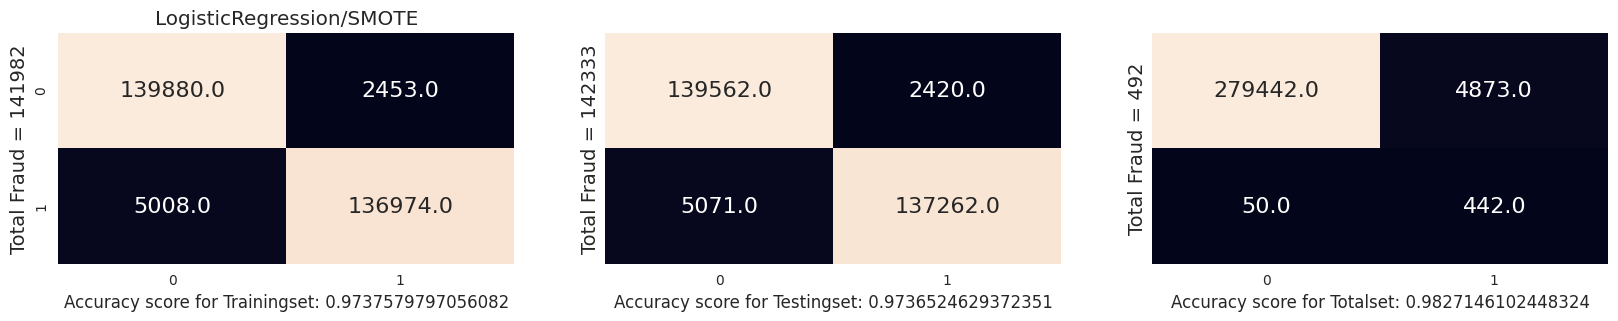

CPU times: user 13.8 s, sys: 35.6 ms, total: 13.9 s
Wall time: 3.95 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [23]:
title = 'LogisticRegression/SMOTE'
%time Models(LogisticRegression(),X_train1, X_test1, y_train1, y_test1, title)

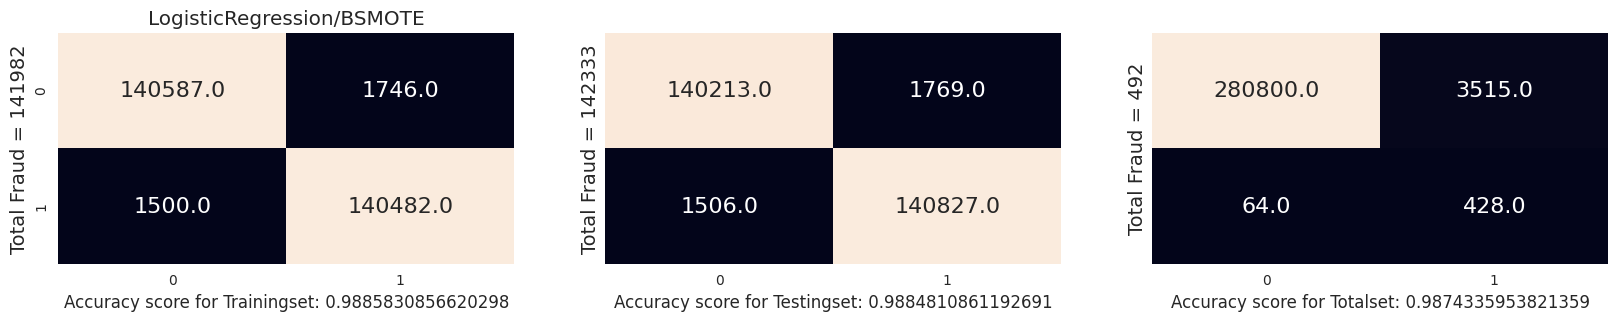

CPU times: user 12.7 s, sys: 35.1 ms, total: 12.7 s
Wall time: 3.63 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]))

In [24]:
title = 'LogisticRegression/BSMOTE'
%time Models(LogisticRegression(),X_train2, X_test2, y_train2, y_test2, title)

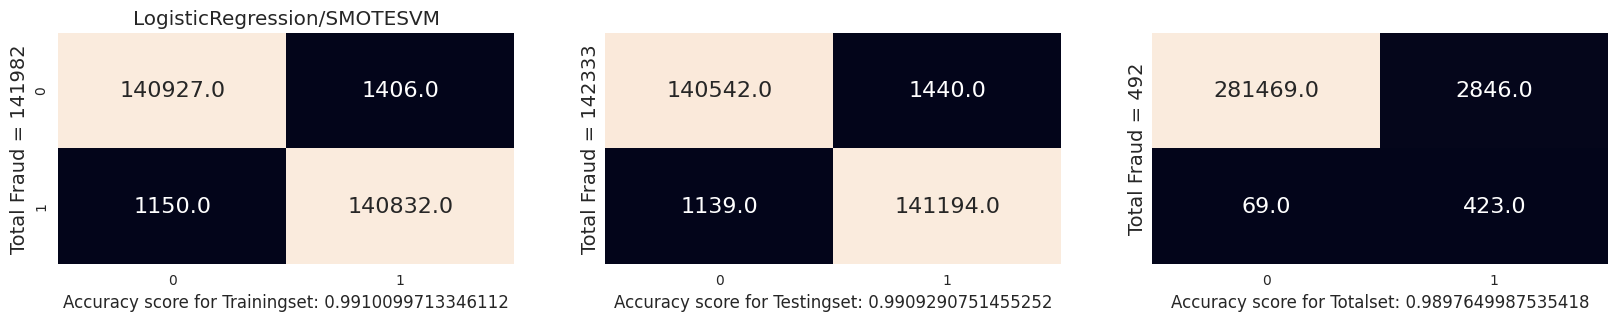

CPU times: user 13.7 s, sys: 24.2 ms, total: 13.7 s
Wall time: 3.87 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]))

In [25]:
title = 'LogisticRegression/SMOTESVM'
%time Models(LogisticRegression(),X_train3, X_test3, y_train3, y_test3, title)

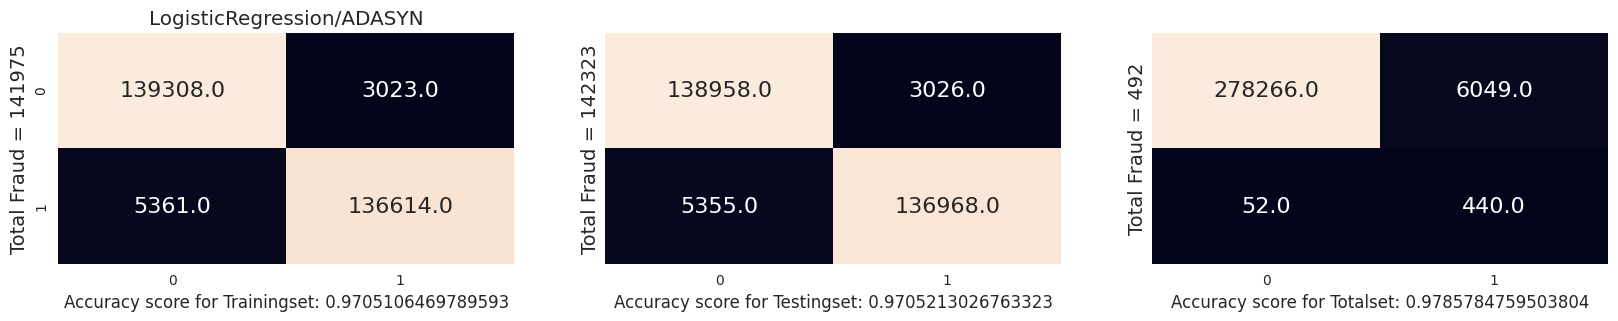

CPU times: user 13.9 s, sys: 30.3 ms, total: 14 s
Wall time: 3.94 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [26]:
title = 'LogisticRegression/ADASYN'
%time Models(LogisticRegression(),X_train4, X_test4, y_train4, y_test4, title)

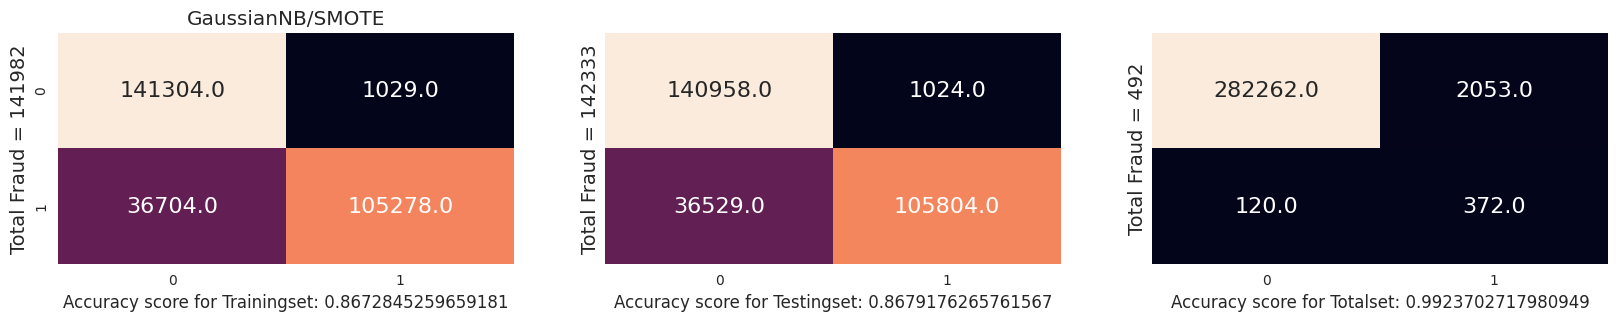

CPU times: user 2.07 s, sys: 440 ms, total: 2.51 s
Wall time: 1.56 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [27]:
title = 'GaussianNB/SMOTE'
%time Models(GaussianNB(),X_train1, X_test1, y_train1, y_test1, title)

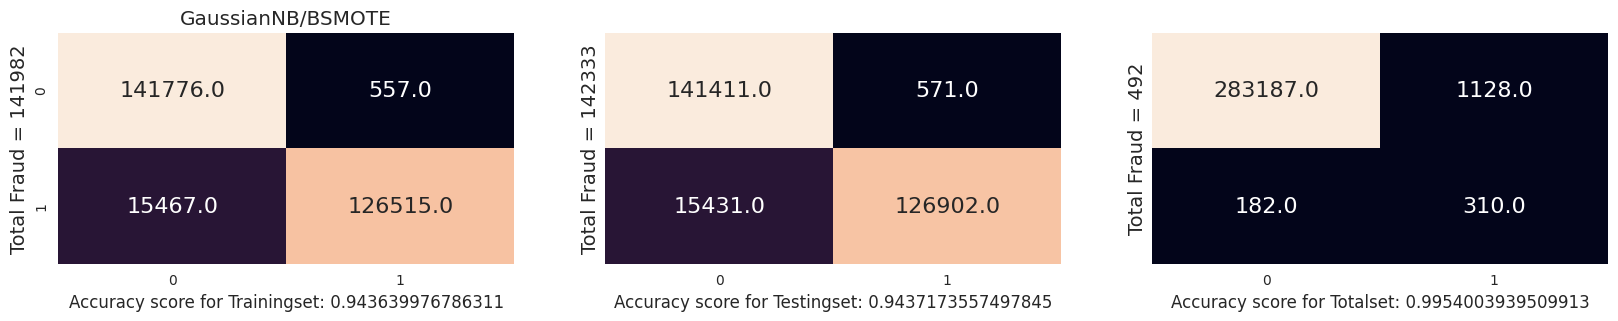

CPU times: user 2.05 s, sys: 440 ms, total: 2.49 s
Wall time: 1.53 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [28]:
title = 'GaussianNB/BSMOTE'
%time Models(GaussianNB(),X_train2, X_test2, y_train2, y_test2, title)

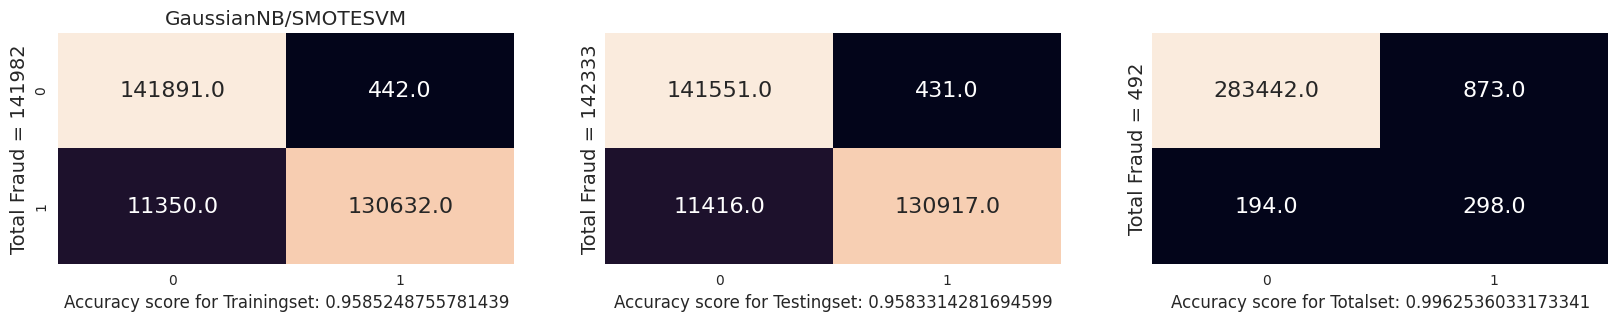

CPU times: user 2.03 s, sys: 449 ms, total: 2.48 s
Wall time: 1.53 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [29]:
title = 'GaussianNB/SMOTESVM'
%time Models(GaussianNB(),X_train3, X_test3, y_train3, y_test3, title)

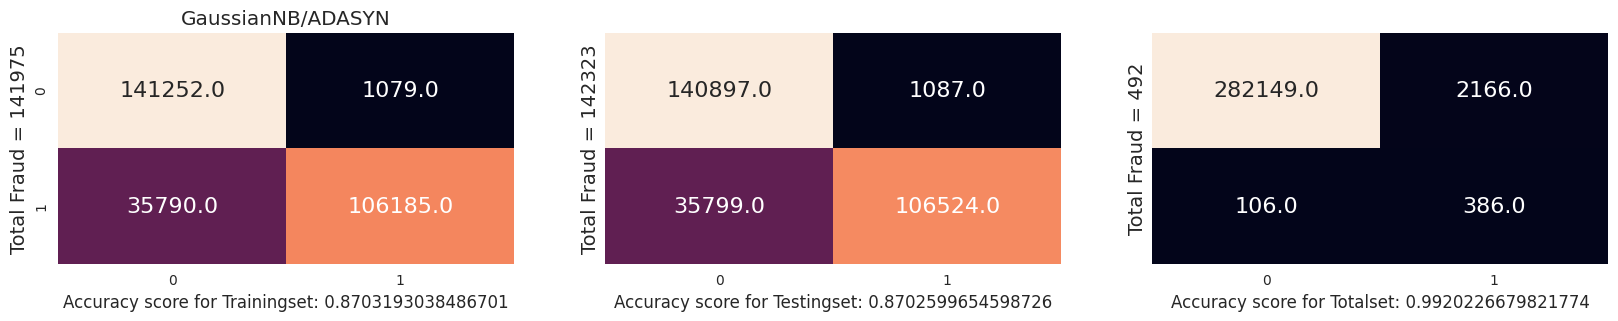

CPU times: user 2.16 s, sys: 455 ms, total: 2.61 s
Wall time: 1.68 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [30]:
title = 'GaussianNB/ADASYN'
%time Models(GaussianNB(),X_train4, X_test4, y_train4, y_test4, title)

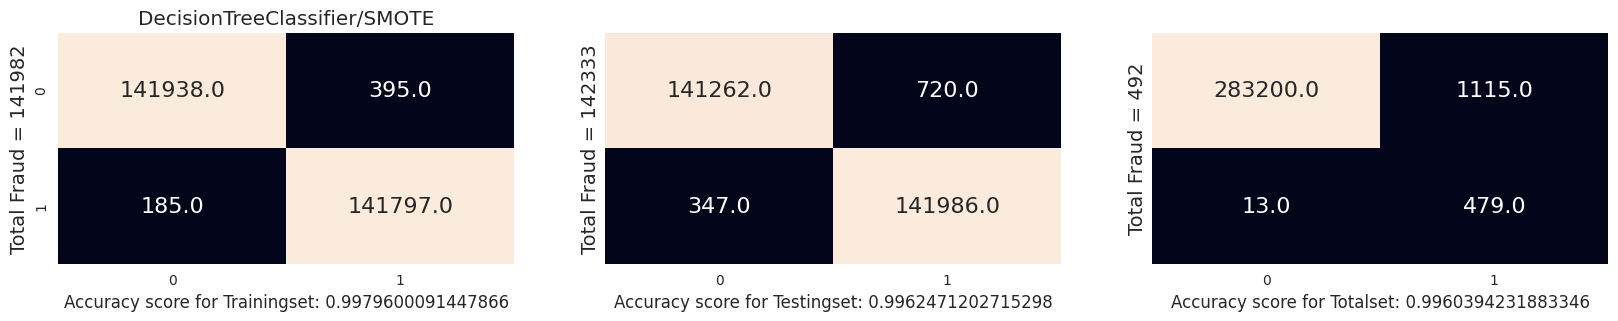

CPU times: user 19.8 s, sys: 84 ms, total: 19.8 s
Wall time: 19.8 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [32]:
title = 'DecisionTreeClassifier/SMOTE'
%time Models(DecisionTreeClassifier(max_depth=14),X_train1, X_test1, y_train1, y_test1, title)

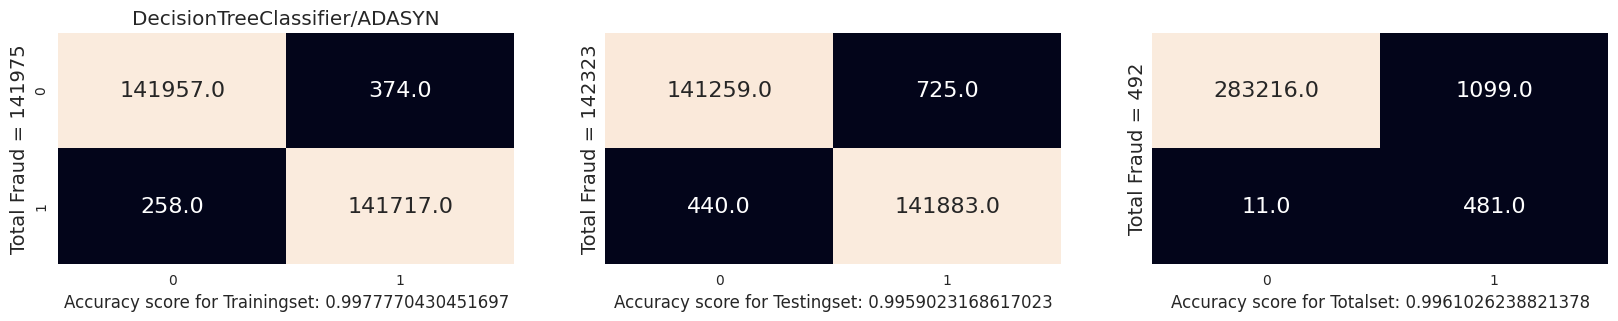

CPU times: user 19.7 s, sys: 76 ms, total: 19.8 s
Wall time: 19.8 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [33]:
title = 'DecisionTreeClassifier/ADASYN'
%time Models(DecisionTreeClassifier(max_depth=14),X_train4, X_test4, y_train4, y_test4, title)

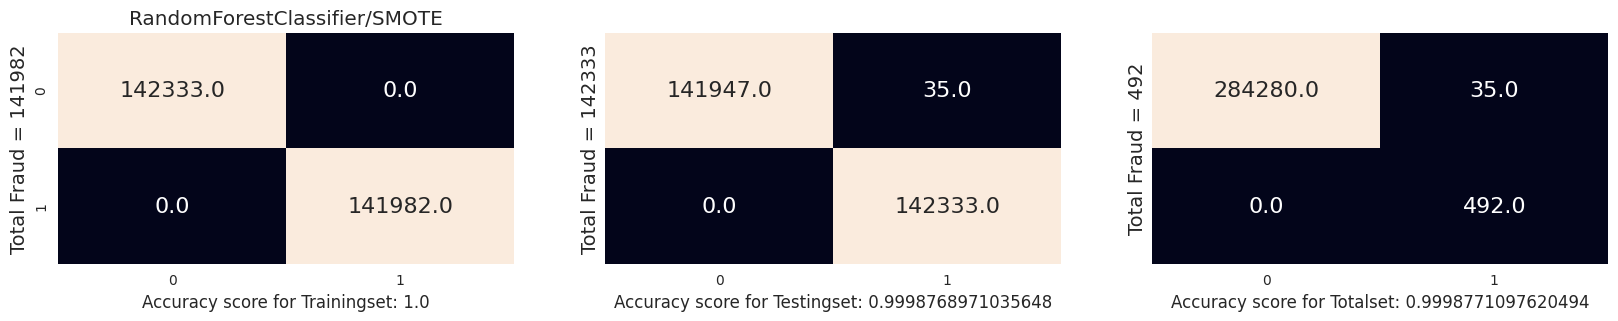

CPU times: user 4min 1s, sys: 104 ms, total: 4min 2s
Wall time: 4min 2s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [34]:
title = 'RandomForestClassifier/SMOTE'
%time Models(RandomForestClassifier(),X_train1, X_test1, y_train1, y_test1, title)

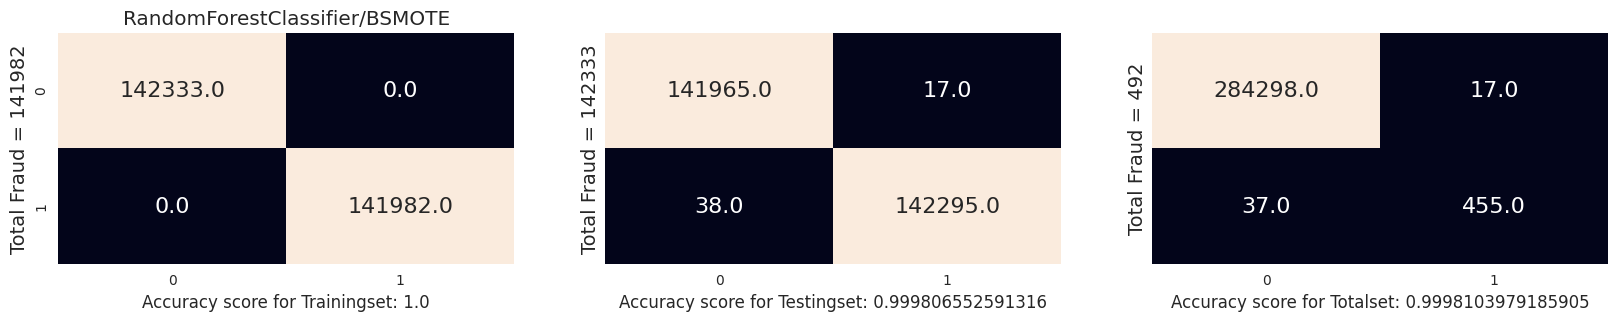

CPU times: user 3min 23s, sys: 97 ms, total: 3min 23s
Wall time: 3min 23s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [35]:
title = 'RandomForestClassifier/BSMOTE'
%time Models(RandomForestClassifier(),X_train2, X_test2, y_train2, y_test2, title)

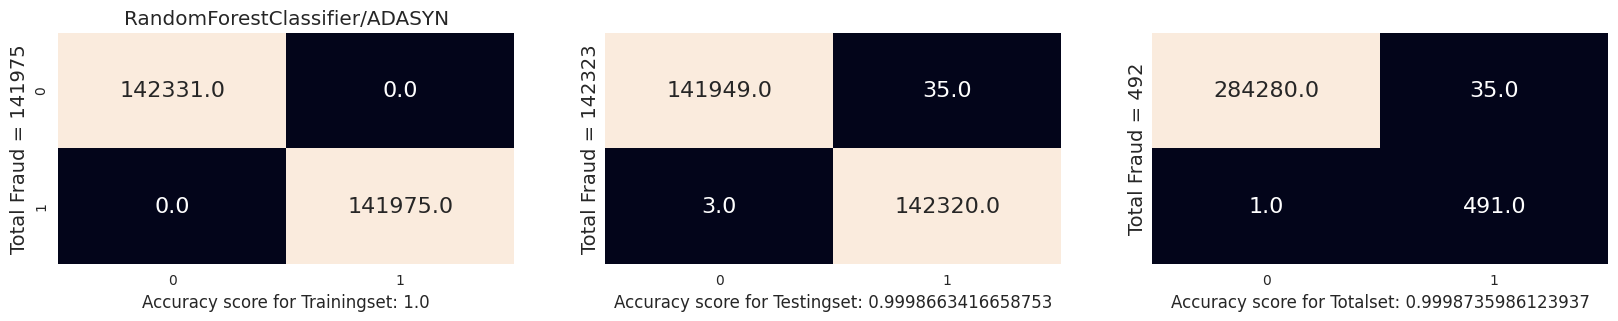

CPU times: user 3min 56s, sys: 109 ms, total: 3min 56s
Wall time: 3min 56s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [36]:
title = 'RandomForestClassifier/ADASYN'
%time Models(RandomForestClassifier(),X_train4, X_test4, y_train4, y_test4, title)

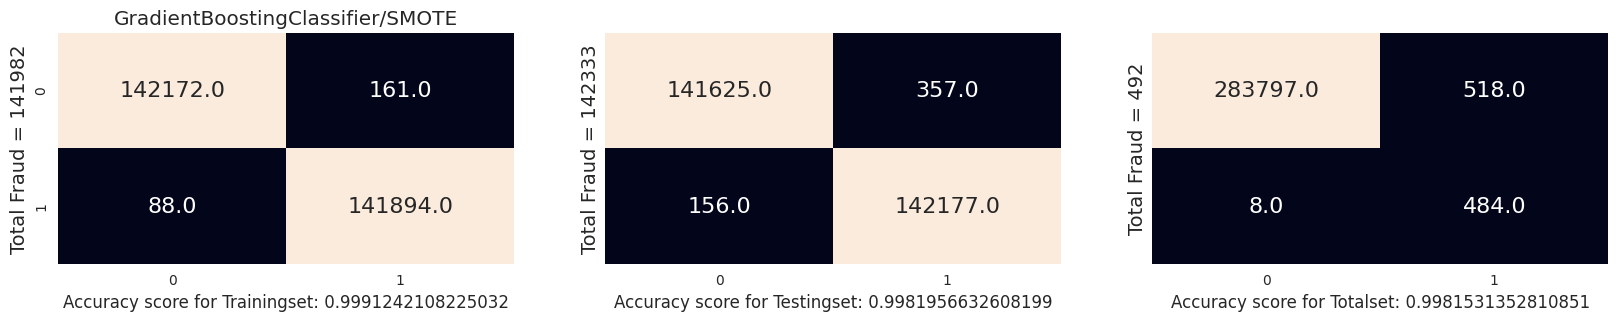

CPU times: user 2min 6s, sys: 90 ms, total: 2min 6s
Wall time: 2min 7s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [37]:
title = 'GradientBoostingClassifier/SMOTE'
%time Models(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train1, X_test1, y_train1, y_test1, title)

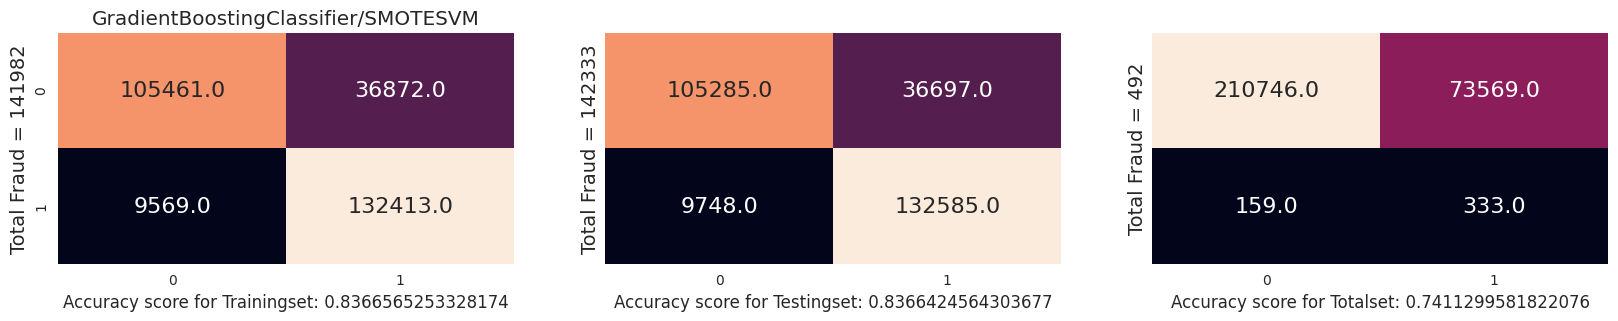

CPU times: user 2min 1s, sys: 109 ms, total: 2min 1s
Wall time: 2min 1s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [39]:
title = 'GradientBoostingClassifier/SMOTESVM'
%time Models(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train3, X_test3, y_train3, y_test3, title)

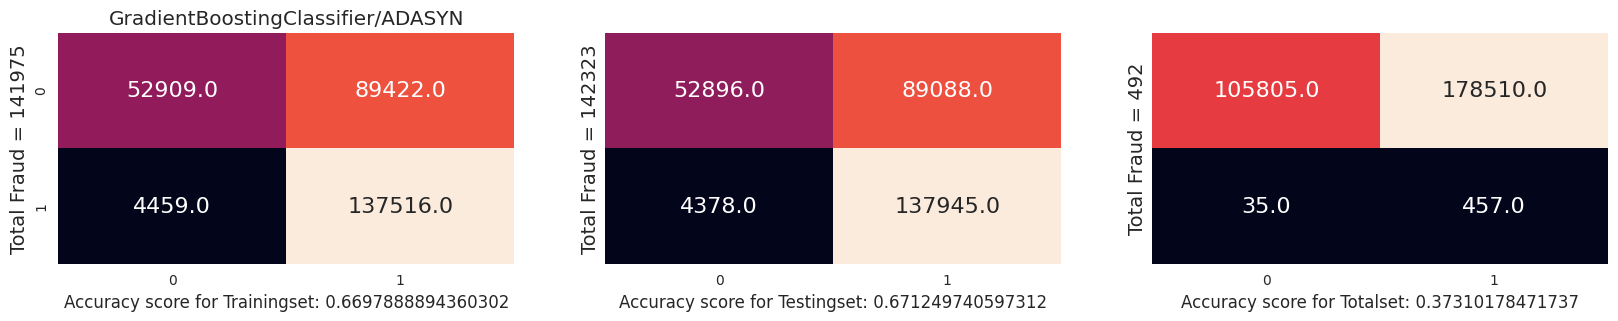

CPU times: user 2min 8s, sys: 79 ms, total: 2min 8s
Wall time: 2min 8s


(array([0, 0, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]))

In [40]:
title = 'GradientBoostingClassifier/ADASYN'
%time Models(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train4, X_test4, y_train4, y_test4, title)

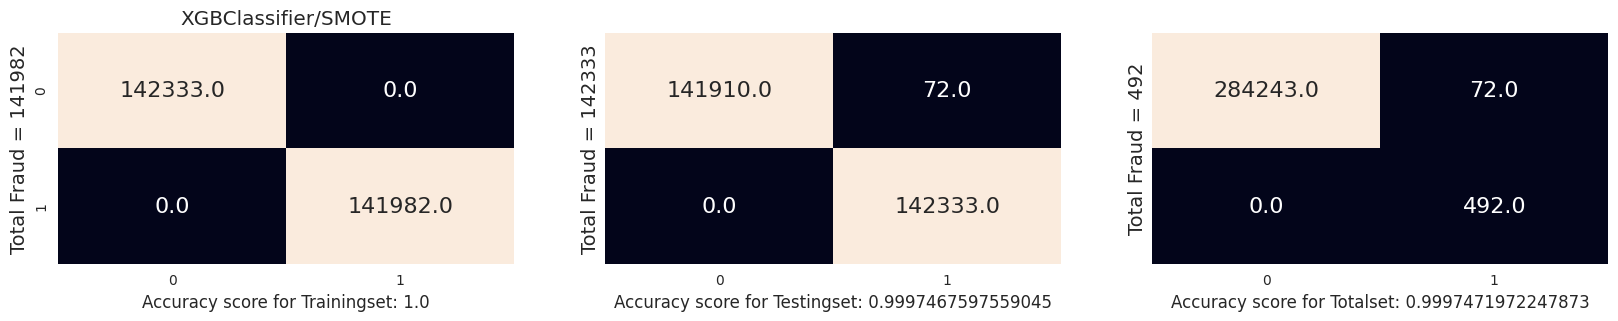

CPU times: user 18.3 s, sys: 115 ms, total: 18.4 s
Wall time: 5.13 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [41]:
title = 'XGBClassifier/SMOTE'
%time Models(XGBClassifier(),X_train1, X_test1, y_train1, y_test1, title)

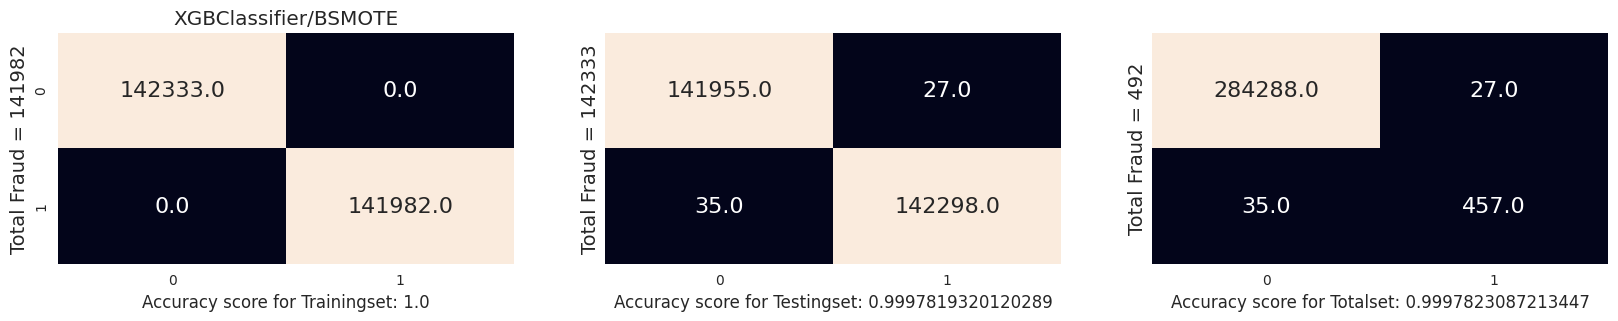

CPU times: user 16.5 s, sys: 49.8 ms, total: 16.5 s
Wall time: 4.52 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [42]:
title = 'XGBClassifier/BSMOTE'
%time Models(XGBClassifier(),X_train2, X_test2, y_train2, y_test2, title)

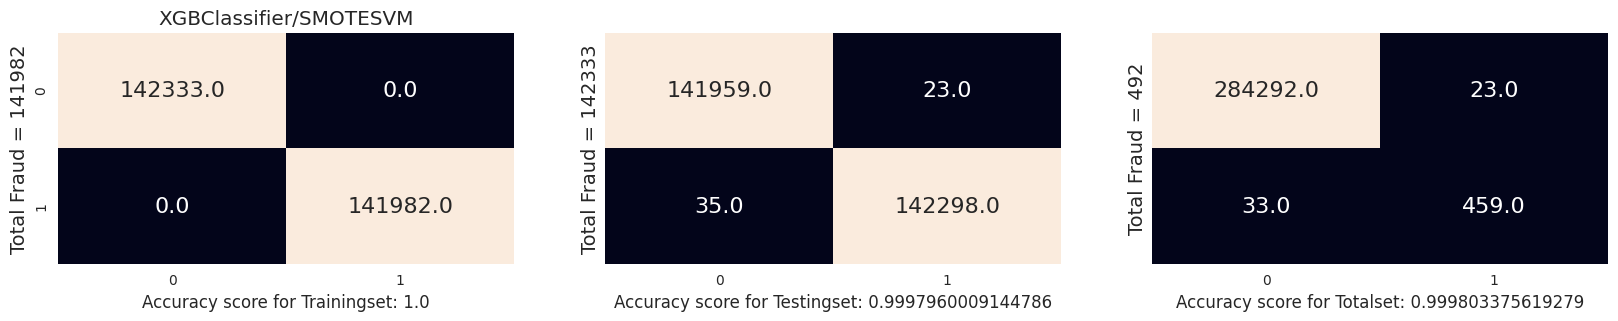

CPU times: user 16.5 s, sys: 42.9 ms, total: 16.6 s
Wall time: 4.63 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [43]:
title = 'XGBClassifier/SMOTESVM'
%time Models(XGBClassifier(),X_train3, X_test3, y_train3, y_test3, title)

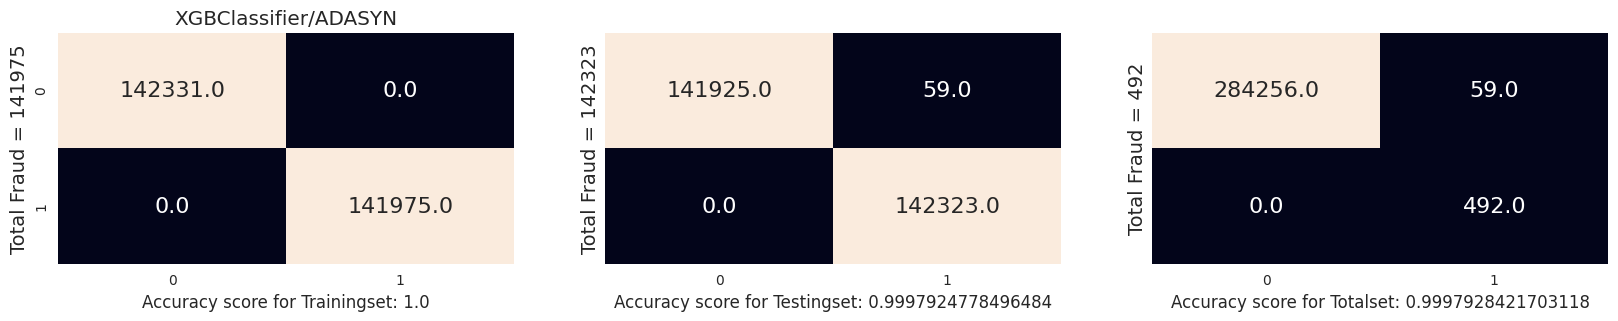

CPU times: user 18 s, sys: 35.9 ms, total: 18 s
Wall time: 4.86 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [44]:
title = 'XGBClassifier/ADASYN'
%time Models(XGBClassifier(),X_train4, X_test4, y_train4, y_test4, title)

[LightGBM] [Info] Number of positive: 141982, number of negative: 142333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 284315, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499383 -> initscore=-0.002469
[LightGBM] [Info] Start training from score -0.002469


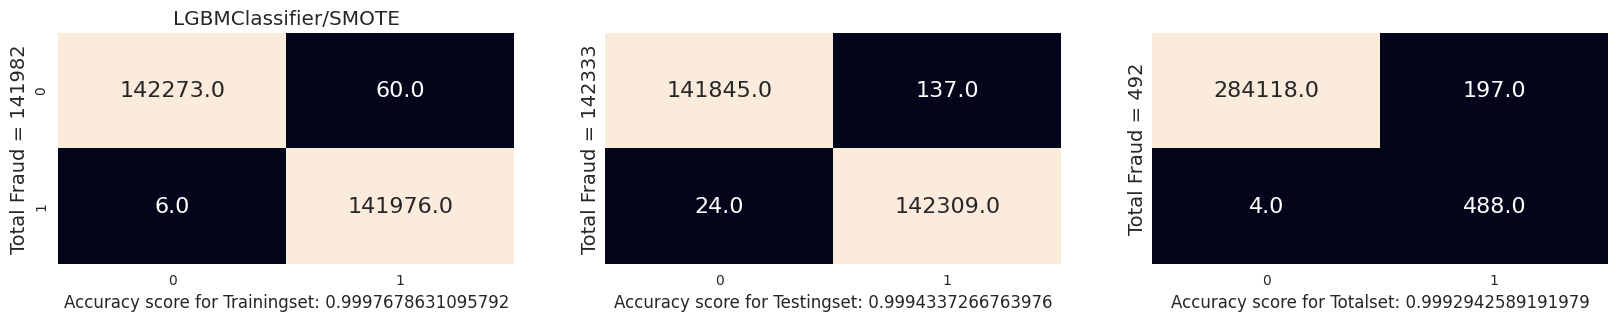

CPU times: user 18.5 s, sys: 107 ms, total: 18.6 s
Wall time: 9.66 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [45]:
title = 'LGBMClassifier/SMOTE'
%time Models(LGBMClassifier(),X_train1, X_test1, y_train1, y_test1, title)

[LightGBM] [Info] Number of positive: 141982, number of negative: 142333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 284315, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499383 -> initscore=-0.002469
[LightGBM] [Info] Start training from score -0.002469


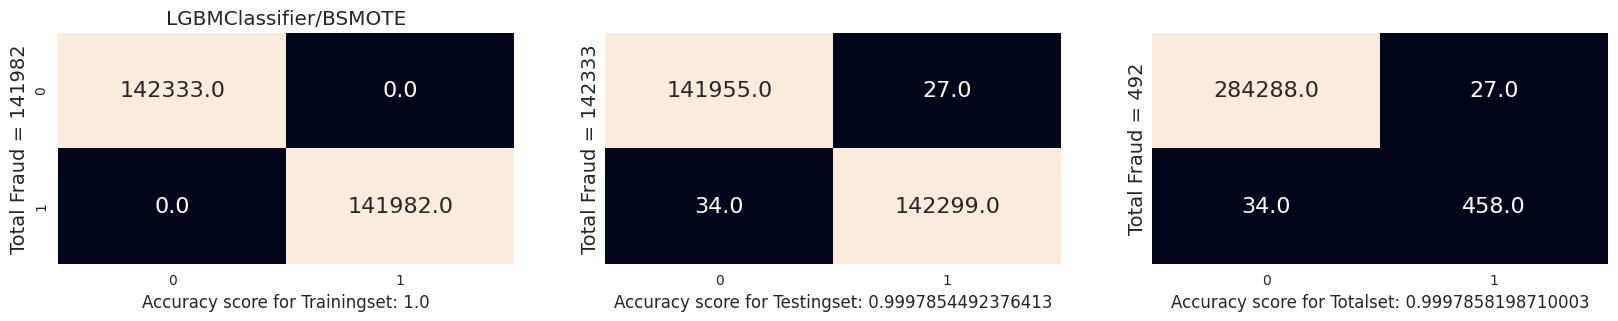

CPU times: user 12.6 s, sys: 100 ms, total: 12.7 s
Wall time: 6.74 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [46]:
title = 'LGBMClassifier/BSMOTE'
%time Models(LGBMClassifier(),X_train2, X_test2, y_train2, y_test2, title)

[LightGBM] [Info] Number of positive: 141975, number of negative: 142331
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 284306, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499374 -> initscore=-0.002504
[LightGBM] [Info] Start training from score -0.002504


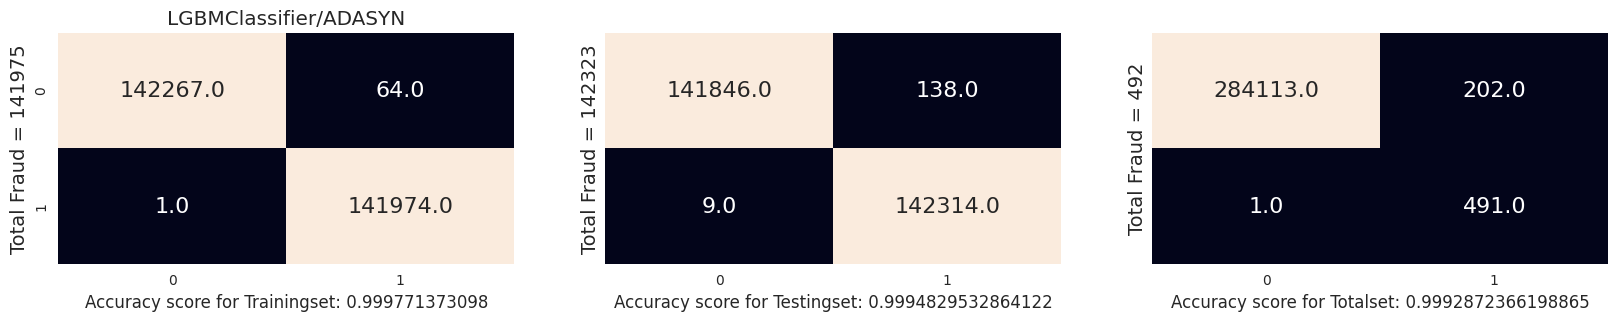

CPU times: user 18.6 s, sys: 95 ms, total: 18.7 s
Wall time: 9.76 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [47]:
title = 'LGBMClassifier/ADASYN'
%time Models(LGBMClassifier(),X_train4, X_test4, y_train4, y_test4, title)

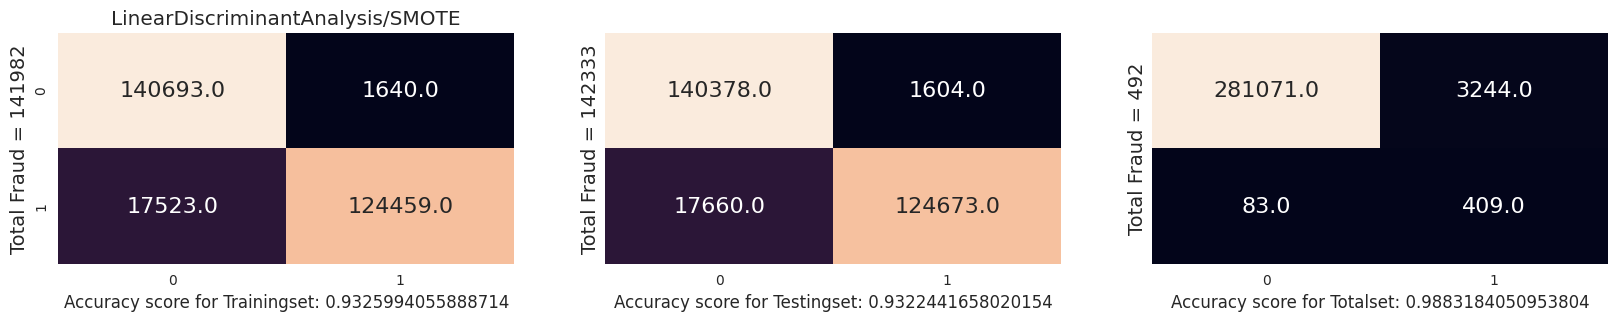

CPU times: user 1.35 s, sys: 128 ms, total: 1.48 s
Wall time: 1.53 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [48]:
title = 'LinearDiscriminantAnalysis/SMOTE'
%time Models(LinearDiscriminantAnalysis(),X_train1, X_test1, y_train1, y_test1, title)

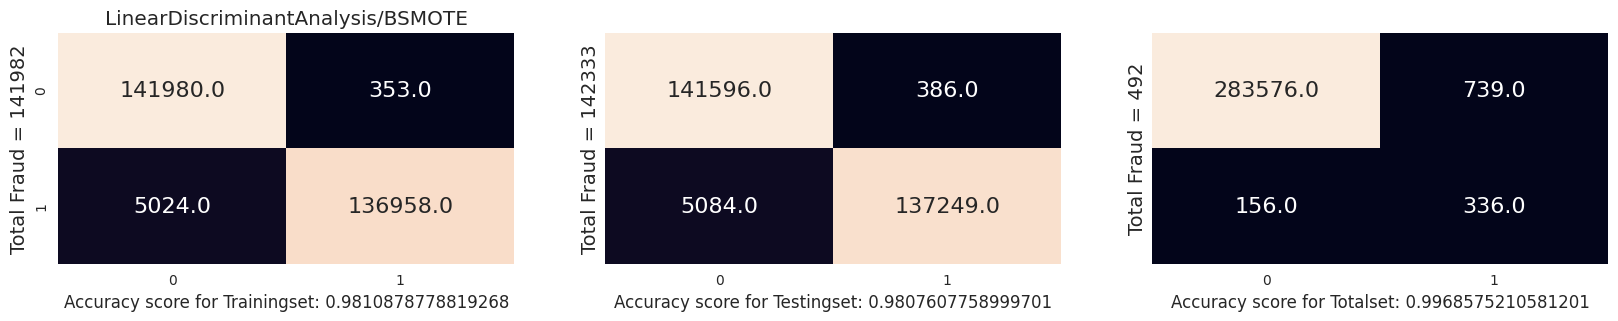

CPU times: user 1.36 s, sys: 108 ms, total: 1.47 s
Wall time: 1.47 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [49]:
title = 'LinearDiscriminantAnalysis/BSMOTE'
%time Models(LinearDiscriminantAnalysis(),X_train2, X_test2, y_train2, y_test2, title)

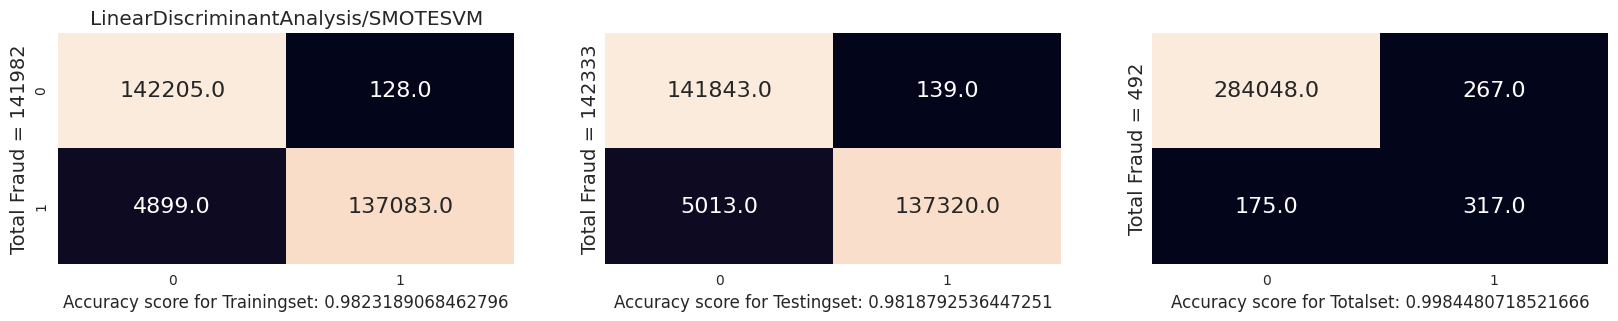

CPU times: user 1.39 s, sys: 106 ms, total: 1.5 s
Wall time: 1.5 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [50]:
title = 'LinearDiscriminantAnalysis/SMOTESVM'
%time Models(LinearDiscriminantAnalysis(),X_train3, X_test3, y_train3, y_test3, title)

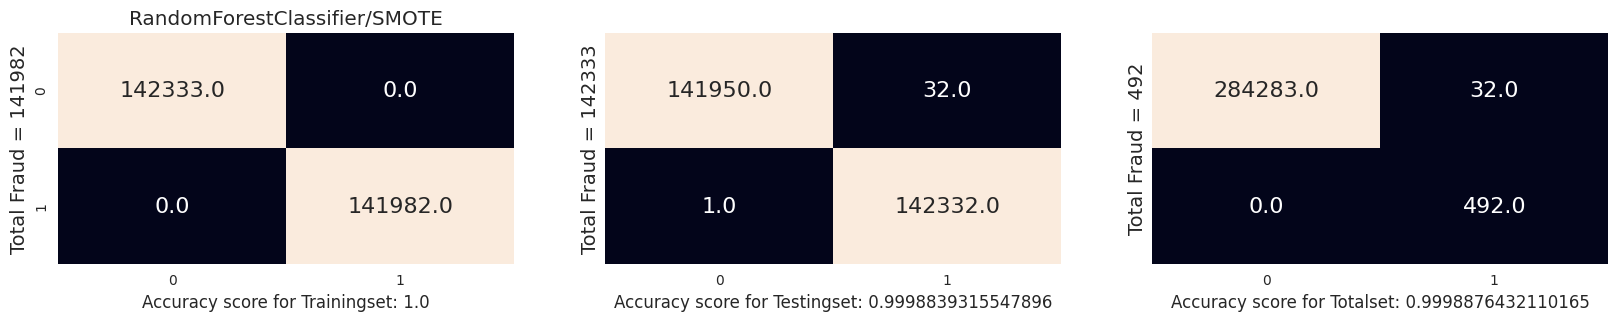

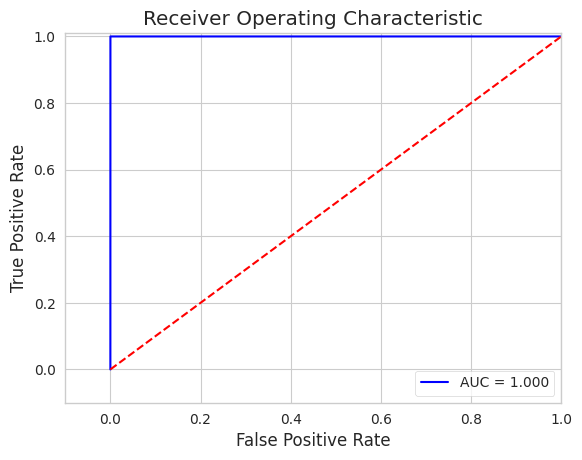

In [51]:
from sklearn.metrics import confusion_matrix,auc,roc_curve

title = 'RandomForestClassifier/SMOTE'
y, ypred =  Models(RandomForestClassifier(),X_train1, X_test1, y_train1, y_test1, title)

fpr, tpr, thresholds = roc_curve(y, ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()